In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os

In [ ]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Este DataSet no contiene ningún nulo.

In [ ]:
df=df.drop_duplicates()
df.shape

(10000, 14)

Nuestro DataSet no contiene ningún dato duplicado. 

In [ ]:
pd.set_option('display.max_rows', None) 
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

Esto nos mostraría el porcentaje de nulos que hay en las columnas de nuestro DataSet, al no haber presencia de nulos, el código no nos arroja ningún valor.

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


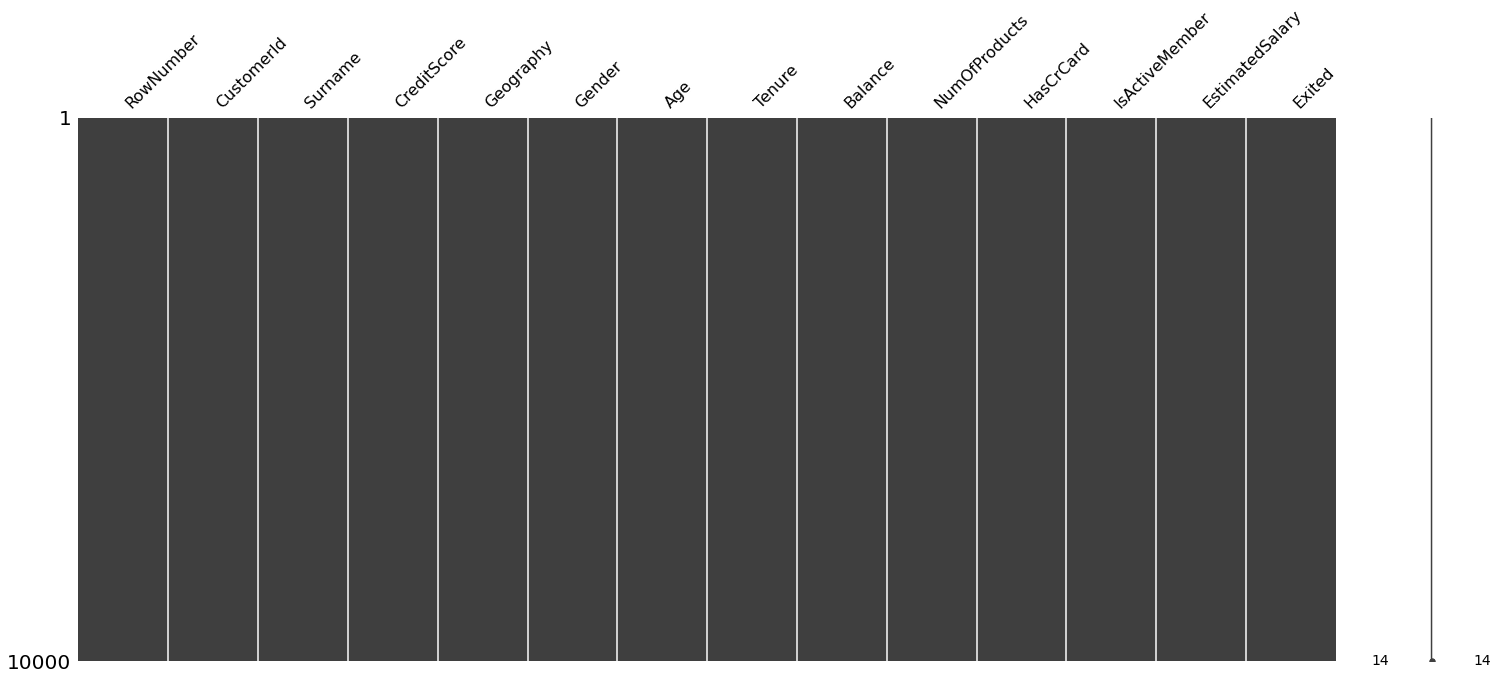

In [ ]:
import missingno as msno
msno.matrix(df);

Todas las columnas estan llenas debido a que no hay presencia de valores nulos en el DataSet. 

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


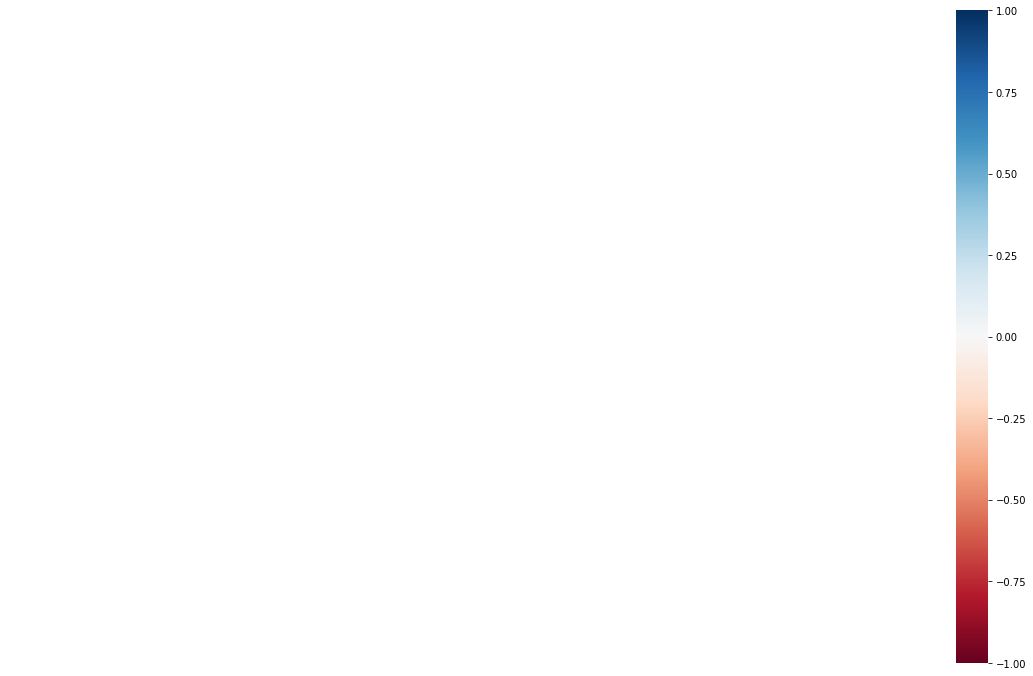

In [ ]:
msno.heatmap(df);

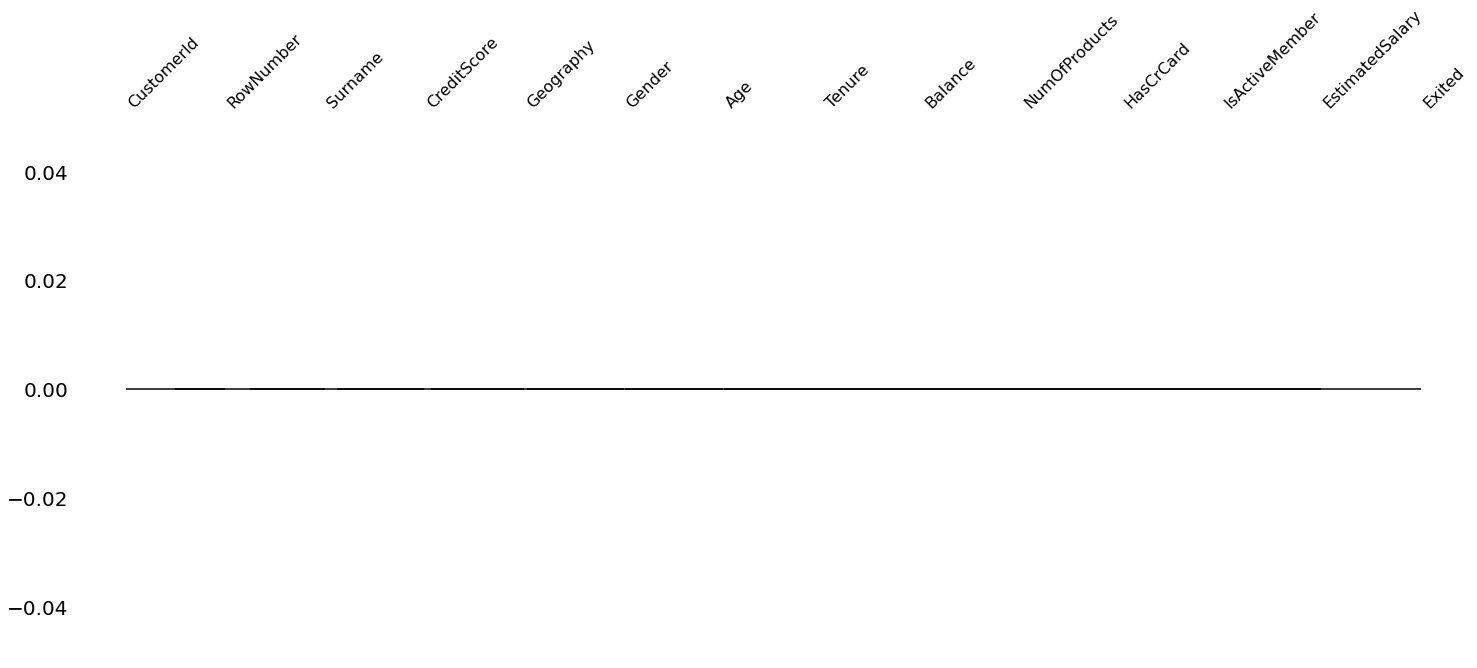

In [ ]:
msno.dendrogram(df);

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_geography = pd.get_dummies(df["Geography"], prefix="Geography")

In [ ]:
df1 = df.drop(["Surname", "CustomerId","Tenure","RowNumber"], axis=1)

Consideramos que las variables "Surname" ("Apellido"), "CustomerID" y "Tenure" no son de importancia para nuestro Dataset por eso decidimos eliminar dichas variables.

In [ ]:
df2 = df1.drop(["Geography"], axis=1)
df3 = df2.drop(["Gender"], axis=1)

In [ ]:
df3.shape


(10000, 8)

In [ ]:
df3 = pd.concat([df3, dummy_gender, dummy_geography], axis=1)
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [ ]:
df3 = df3[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Spain','Exited']]
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain,Exited
0,619,42,0.00,1,1,1,101348.88,0,1,0,1
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,0,1,0,1
3,699,39,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


Decidimos omitir las variables "Gender_Female" y "Geography_Germany" para no causar una dependencia entre variables

Como el conjunto entero de datos no presentaba variables nulas ni tampoco duplicados, este subconjunto tampoco tendrá variables nulas ni duplicados.

In [ ]:
df3.shape

(10000, 11)

In [ ]:
df3=df3.drop_duplicates()
df3.shape

(10000, 11)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Age               10000 non-null  int64  
 2   Balance           10000 non-null  float64
 3   NumOfProducts     10000 non-null  int64  
 4   HasCrCard         10000 non-null  int64  
 5   IsActiveMember    10000 non-null  int64  
 6   EstimatedSalary   10000 non-null  float64
 7   Gender_Male       10000 non-null  uint8  
 8   Geography_France  10000 non-null  uint8  
 9   Geography_Spain   10000 non-null  uint8  
 10  Exited            10000 non-null  int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 732.4 KB


No presenta ningún valor nulo, como lo mencionamos anteriormente.